In [133]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

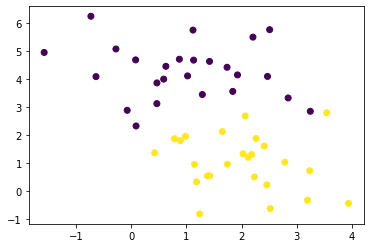

In [34]:
# generate 2d dataset - 50 points
X, y = make_blobs(n_samples=50, centers=2, n_features=2,random_state=0)
# scatter plot
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
plt.scatter(X[:,0], y=X[:,1], c = y)

In [124]:
# Create SVM model
clf_svm = SVC(random_state=0,kernel='linear', C=1000)

In [125]:
# fit dull dataset
clf_svm.fit(X, y)

SVC(C=1000, kernel='linear', random_state=0)

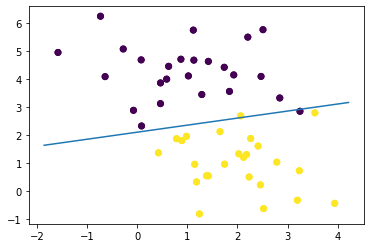

In [126]:
# decision boundary
plt.scatter(X[:,0], y=X[:,1], c = y)
ax = plt.gca()
xlim = ax.get_xlim()
ax.scatter(X[:,0], y=X[:,1], c = y)

w = clf_svm.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (clf_svm.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.show()

In [142]:
# leave-1-out cross-validation
scores_loocv = cross_val_score(clf_svm, X, y, cv=LeaveOneOut())
scores_loocv

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.])

In [153]:
# Accuracy
print(scores_loocv.mean())

0.92


In [191]:
# Improve model by changing C
clf_svm_improve = SVC(random_state=0,kernel='linear', C=1)

In [192]:
clf_svm_improve.fit(X, y)

SVC(C=1, kernel='linear', random_state=0)

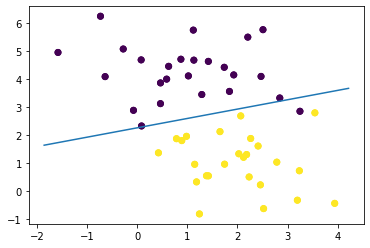

In [193]:
# decision boundary for improvement model
plt.scatter(X[:,0], y=X[:,1], c = y)
ax = plt.gca()
xlim = ax.get_xlim()
ax.scatter(X[:,0], y=X[:,1], c = y)

w = clf_svm_improve.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (clf_svm_improve.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.show()

In [194]:
# leave-1-out cross-validation for improvement model
scores_loocv_improve = cross_val_score(clf_svm_improve, X, y, cv=LeaveOneOut())
scores_loocv_improve

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [195]:
# Accuracy for improvement model
print(scores_loocv_improve.mean())

0.96
